<a href="https://colab.research.google.com/github/JoaoFneves97/Biblioteca_Pandas/blob/main/Case_2_Analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
vendas = pd.read_excel("varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [30]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [31]:
for i in vendas.columns:
  vendas.rename(columns = {i:i.capitalize()},inplace = True)
vendas.columns

Index(['Idcompra', 'Idcanalvenda', 'Bandeira', 'Data', 'Preço',
       'Preço_com_frete', 'Nome_departamento', 'Estado', 'Cliente_log'],
      dtype='object')

In [32]:
# QUANTOS VEZES IDCOMPRA APARECEU POR  CANAL DE VENDAS
# QUANTAS COMPRAS FORAM FEITAS POR CANAL DE VENDAS
vendas.groupby("Idcanalvenda").Idcompra.nunique()

Idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: Idcompra, dtype: int64

In [33]:
# Como app e aplicativo é a mesma coisa substituimos 'app' por 'aplicativo'
vendas["Idcanalvenda"] = vendas["Idcanalvenda"].str.replace("APP","Aplicativo")

In [34]:
vendas["Idcanalvenda"].unique()

array(['Mobile', 'Aplicativo', 'Internet'], dtype=object)

In [35]:
vendas.groupby("Bandeira").Idcompra.nunique()

Bandeira
A    27679
B    38483
Name: Idcompra, dtype: int64

In [36]:
vendas.groupby("Nome_departamento").Idcompra.nunique()

Nome_departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [37]:
vendas["Nome_departamento"] = vendas["Nome_departamento"].str.replace(" ","_")
vendas.groupby("Nome_departamento").Idcompra.nunique()

Nome_departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [38]:
# VERIFICAMOS QUE POSSUI DADOS NULOS E PRECISAMOS TRATA-LOS
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Idcompra           80228 non-null  int64         
 1   Idcanalvenda       80228 non-null  object        
 2   Bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_departamento  80228 non-null  object        
 7   Estado             79926 non-null  object        
 8   Cliente_log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [39]:
vendas[vendas["Estado"].isnull()]

,Idcompra,Idcanalvenda,Bandeira,Data,Preço,Preço_com_frete,Nome_departamento,Estado,Cliente_log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [40]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Idcompra           79926 non-null  int64         
 1   Idcanalvenda       79926 non-null  object        
 2   Bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_departamento  79926 non-null  object        
 7   Estado             79926 non-null  object        
 8   Cliente_log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [41]:
#PELA PREMISSA DO PROJETO, NA COLUNA ESTADO NULL TROCAR POR MS

vendas["Estado"].fillna("MS",inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Idcompra           80228 non-null  int64         
 1   Idcanalvenda       80228 non-null  object        
 2   Bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_departamento  80228 non-null  object        
 7   Estado             80228 non-null  object        
 8   Cliente_log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [42]:
media_price = vendas["Preço"].mean()
vendas["Preço"].fillna(media_price,inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Idcompra           80228 non-null  int64         
 1   Idcanalvenda       80228 non-null  object        
 2   Bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_departamento  80228 non-null  object        
 7   Estado             80228 non-null  object        
 8   Cliente_log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [43]:
display(vendas)

,Idcompra,Idcanalvenda,Bandeira,Data,Preço,Preço_com_frete,Nome_departamento,Estado,Cliente_log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790
...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones_e_Celulares,RJ,15746
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones_e_Celulares,AM,443
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones_e_Celulares,PB,9349
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones_e_Celulares,PB,10944


In [44]:
  # TEMOS UMA PREMISSA QUE O PRECO NAO PODE SER MAIOR QUE O PREÇO COM FRETE
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [45]:
vendas_errada = vendas.query("Preço > Preço_com_frete")
vendas_correta = vendas.query("Preço < Preço_com_frete")
vendas_correta.head()

,Idcompra,Idcanalvenda,Bandeira,Data,Preço,Preço_com_frete,Nome_departamento,Estado,Cliente_log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [46]:
vendas_correta.query("Nome_departamento == 'Esporte_e_Lazer' and Estado == 'SP'")

,Idcompra,Idcanalvenda,Bandeira,Data,Preço,Preço_com_frete,Nome_departamento,Estado,Cliente_log
115,67265,Internet,A,2023-01-19,207.2,229.024,Esporte_e_Lazer,SP,15386
272,40850,Aplicativo,B,2023-04-06,335.2,373.952,Esporte_e_Lazer,SP,21402
714,447850,Aplicativo,A,2023-01-11,1319.2,1348.400,Esporte_e_Lazer,SP,7498
1352,119890,Mobile,B,2023-03-09,167.2,197.576,Esporte_e_Lazer,SP,19997
1389,114150,Mobile,B,2023-03-07,1743.2,1761.056,Esporte_e_Lazer,SP,15256
...,...,...,...,...,...,...,...,...,...
69360,186900,Aplicativo,B,2023-04-12,479.2,511.760,Esporte_e_Lazer,SP,22412
69424,196585,Internet,B,2023-02-04,1159.2,1235.944,Esporte_e_Lazer,SP,7783
70680,135895,Internet,A,2023-03-23,1039.2,1053.528,Esporte_e_Lazer,SP,19827
71173,479520,Aplicativo,B,2023-03-25,1199.2,1230.040,Esporte_e_Lazer,SP,10609


In [47]:
# PRIMEIRA METRICA - DEPARTAMENTOS MAIS VENDIDOS

vendas_correta.groupby("Nome_departamento").Idcompra.nunique().sort_values(ascending = False).reset_index()

,Nome_departamento,Idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [48]:
# SEGUNDA METRICA - MEDIA DE PRECO COM FRETE NOME DE DEPARTAMENTO

round(vendas_correta.groupby("Nome_departamento")["Preço_com_frete"].agg("mean").sort_values(ascending = False).reset_index(),2)

,Nome_departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [49]:
# TERCEIRA METRICA - QUANTIDADE DE VENDAS POR MES

vendas_correta["Mes"] = vendas_correta["Data"].dt.month

<ipython-input-49-e05c17f3affb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correta["Mes"] = vendas_correta["Data"].dt.month


In [50]:
vendas_correta.groupby("Mes").Idcompra.nunique().sort_values(ascending = False)

Mes
3    5590
4    5454
1    5309
2    5138
Name: Idcompra, dtype: int64

In [51]:
vendas_correta.shape

(22047, 10)

In [52]:
cliente = pd.read_excel("cliente_varejo.xlsx")

In [53]:
for i in cliente.columns:
  cliente.rename(columns = {i:i.capitalize()},inplace = True)
cliente.head()

,Cliente_log,Idade,Renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [54]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Cliente_log  26425 non-null  int64
 1   Idade        26425 non-null  int64
 2   Renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [55]:
cliente["Renda"] = cliente["Renda"].astype(float)

In [56]:
vendas_correta.head()

,Idcompra,Idcanalvenda,Bandeira,Data,Preço,Preço_com_frete,Nome_departamento,Estado,Cliente_log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [57]:
# UNINDO AS DUAS TABELAS ATRAVES DO MERGE

vendas_cliente = vendas_correta.merge(cliente,how="left", on="Cliente_log")
vendas_cliente.head()

,Idcompra,Idcanalvenda,Bandeira,Data,Preço,Preço_com_frete,Nome_departamento,Estado,Cliente_log,Mes,Idade,Renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [58]:
# QUARTA METRICA - MÉDIA DE RENDA PARA CADA TIPO DE CANAL DE VENDA

agg_renda_canal = round(vendas_cliente.groupby("Idcanalvenda")["Renda"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_renda_canal

,Idcanalvenda,Renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [59]:
# QUINTA METRICA - MÉDIA DE IDADE POR BANDEIRA

agg_idade_bandeira = round(vendas_cliente.groupby("Bandeira")["Idade"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_idade_bandeira

,Bandeira,Idade
0,A,53.30
1,B,53.29


In [60]:
# VISUALIZAÇÃO DOS DADOS

import matplotlib.pyplot as plt

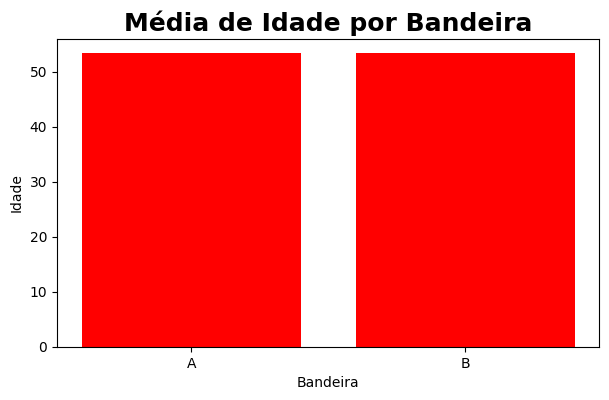

In [61]:
# GRAFICO METRICA 5

fig = plt.figure(figsize = (7,4)) # tamanho da figura

plt.bar(agg_idade_bandeira["Bandeira"],agg_idade_bandeira["Idade"], color = "red")

plt.xlabel("Bandeira")
plt.ylabel("Idade")
plt.title("Média de Idade por Bandeira",fontsize = 18, fontweight = "bold", color = "black");

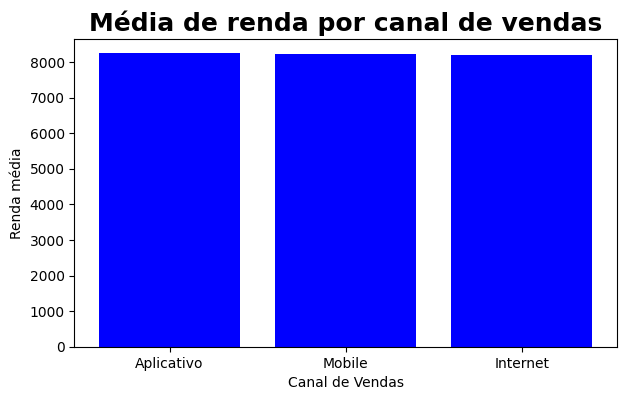

In [62]:
# GRAFICO METRICA 4

fig = plt.figure(figsize = (7,4))

plt.bar(agg_renda_canal["Idcanalvenda"],agg_renda_canal["Renda"], color = "blue")

plt.xlabel("Canal de Vendas")
plt.ylabel("Renda média")
plt.title("Média de renda por canal de vendas", fontsize = 18,fontweight = "bold", color = "black")
plt.show()

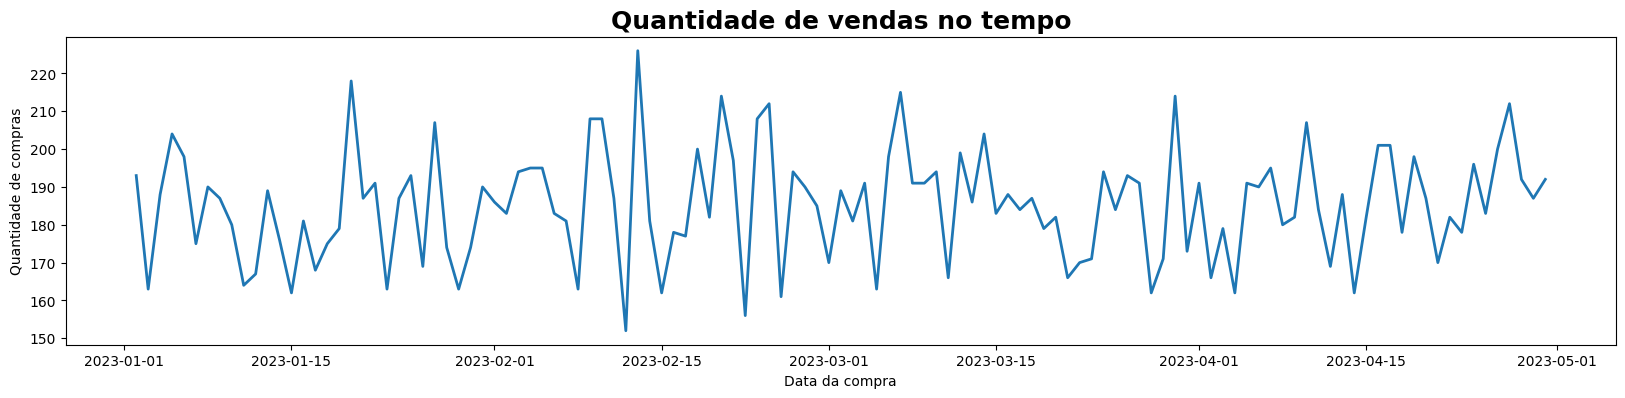

In [63]:
# GRAFICO METRICA 3
vendas_por_data = vendas_correta.groupby("Data").Idcompra.nunique().reset_index()

fig = plt.figure(figsize = (20,4))
plt.xlabel("Data da compra")
plt.ylabel("Quantidade de compras")
plt.title("Quantidade de vendas no tempo",fontsize = 18,fontweight= "bold", color = "black")
x = vendas_por_data["Data"]
y = vendas_por_data["Idcompra"]
plt.plot(x,y,linewidth = "2")
plt.show()

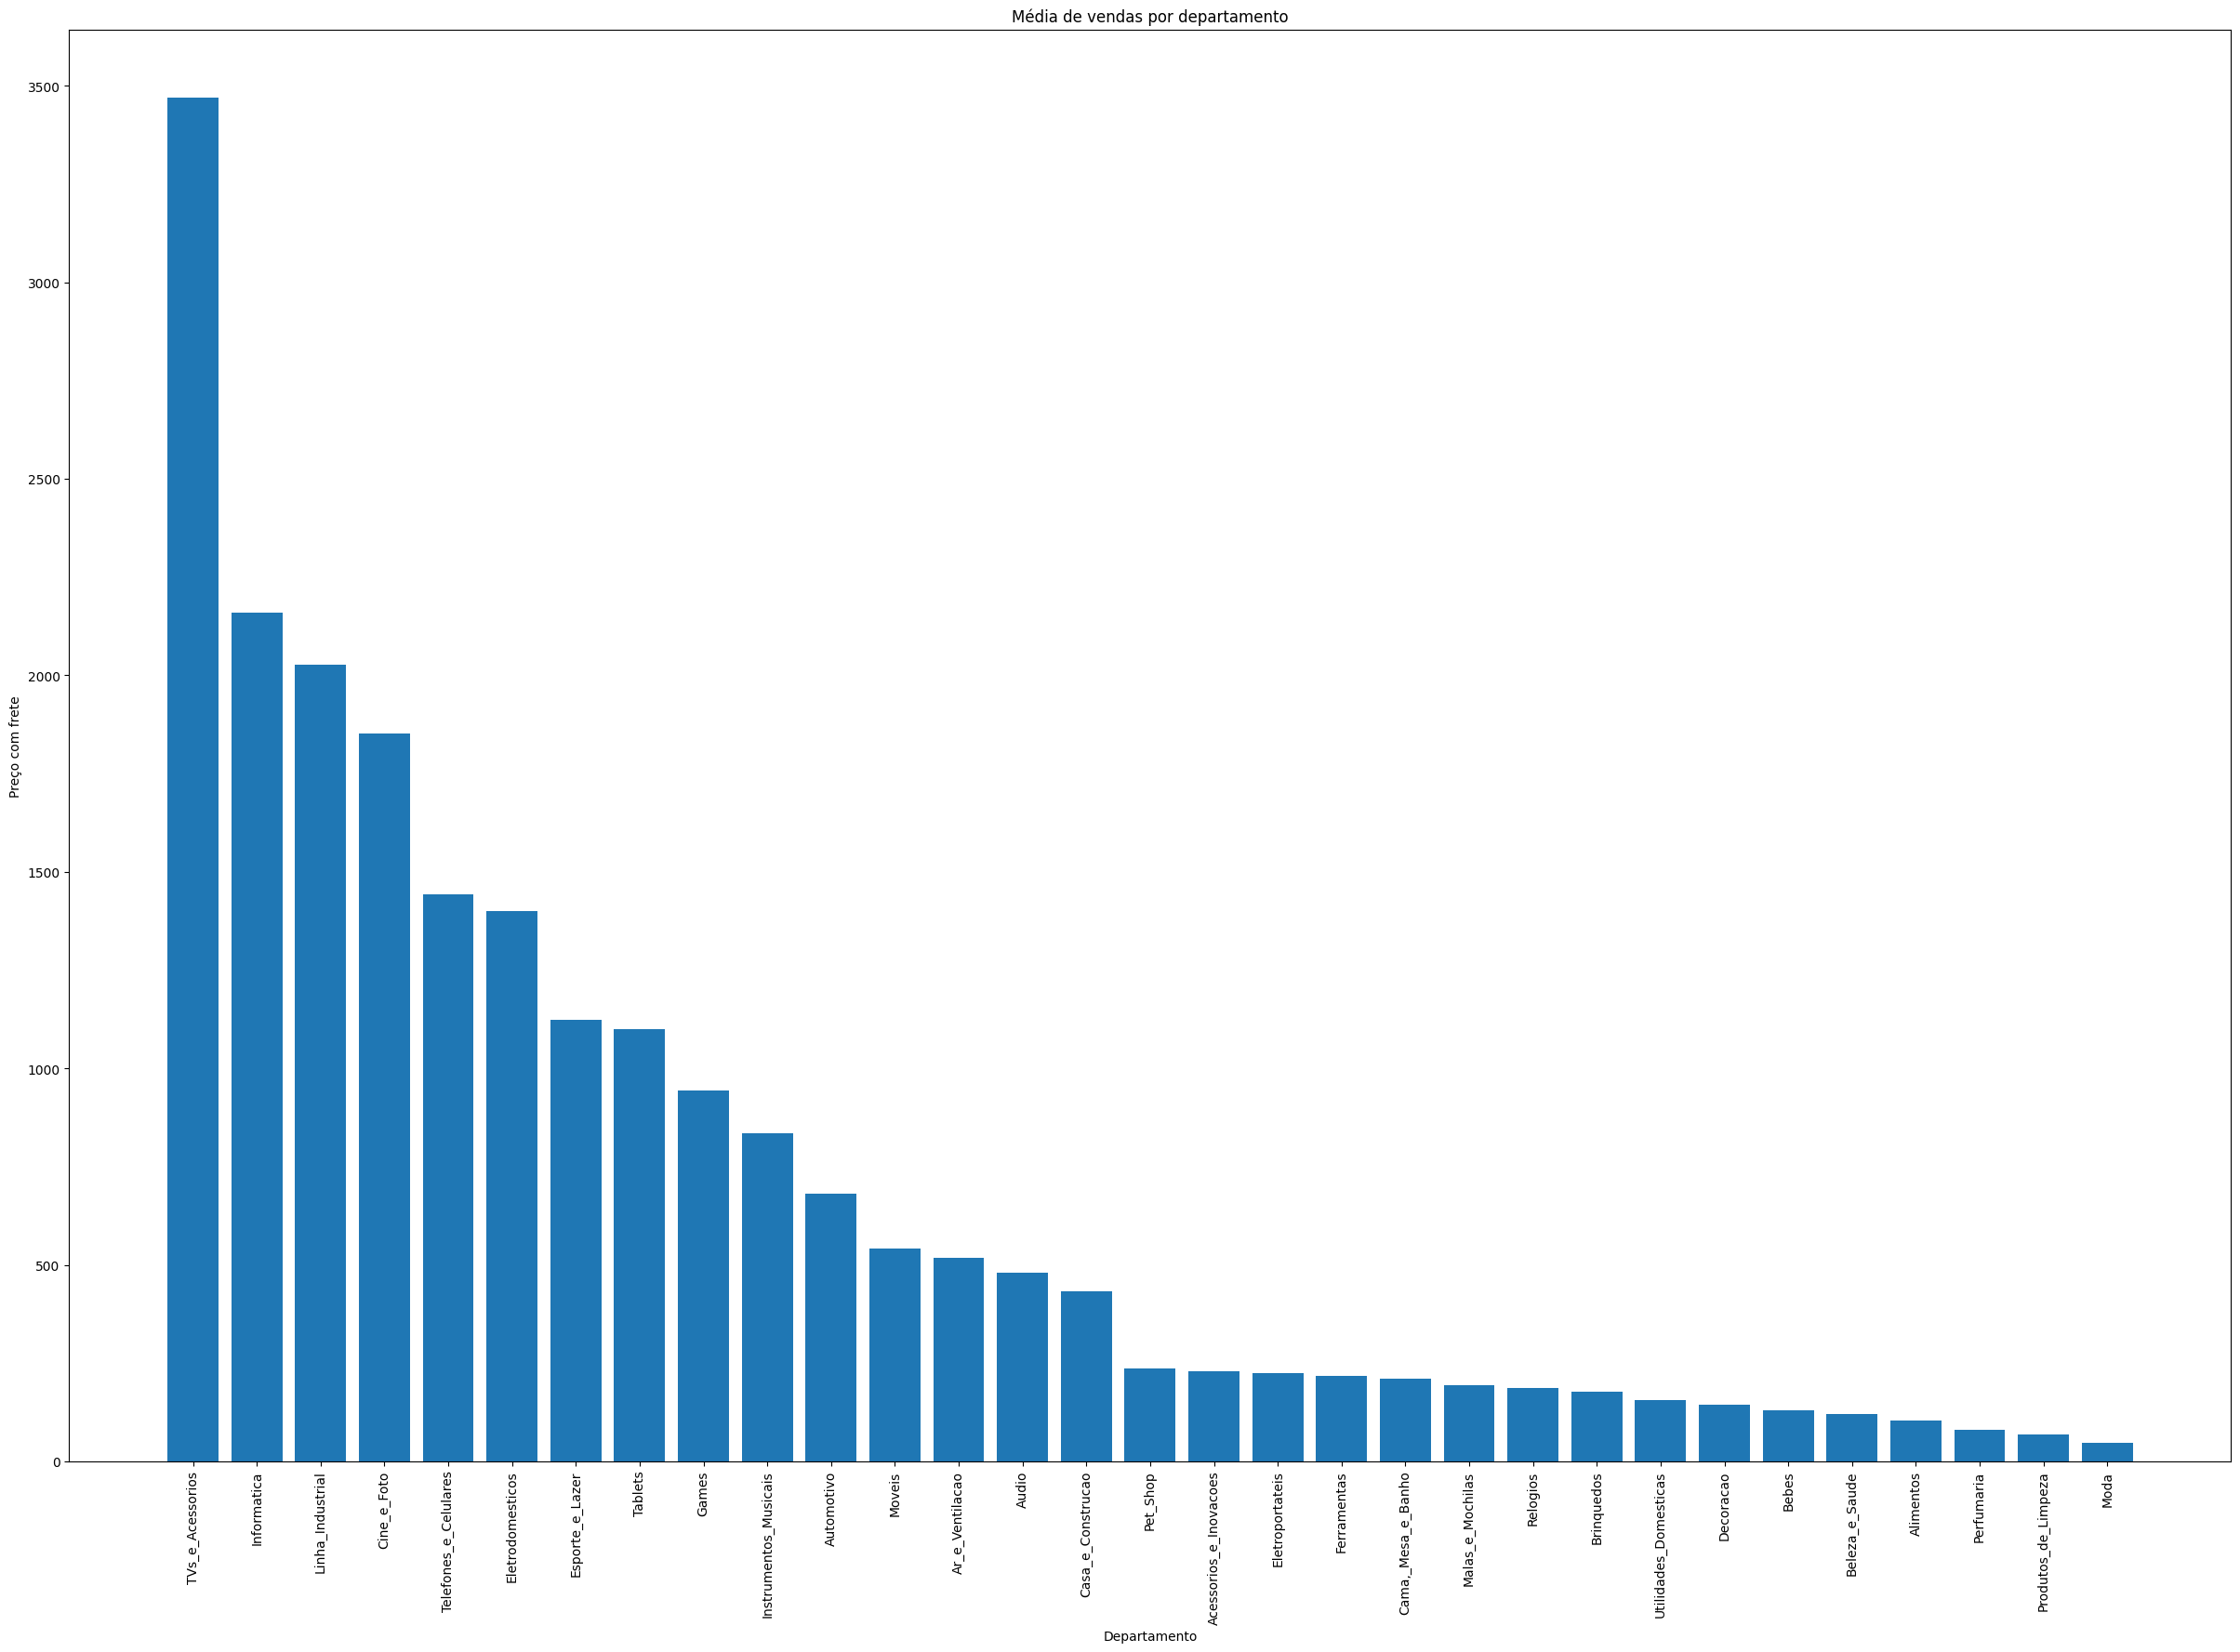

In [64]:
# GRAFICO METRICA 2

agg_dept_preco = round(vendas_correta.groupby("Nome_departamento")["Preço_com_frete"].agg("mean").sort_values(ascending = False).reset_index(),2)


fig = plt.figure(figsize = (30,20))
plt.xlabel("Departamento")
plt.ylabel("Preço com frete")
plt.title("Média de vendas por departamento")
x = agg_dept_preco["Nome_departamento"]
y = agg_dept_preco["Preço_com_frete"]
plt.xticks(rotation = "vertical")
plt.bar(x,y)
plt.show()

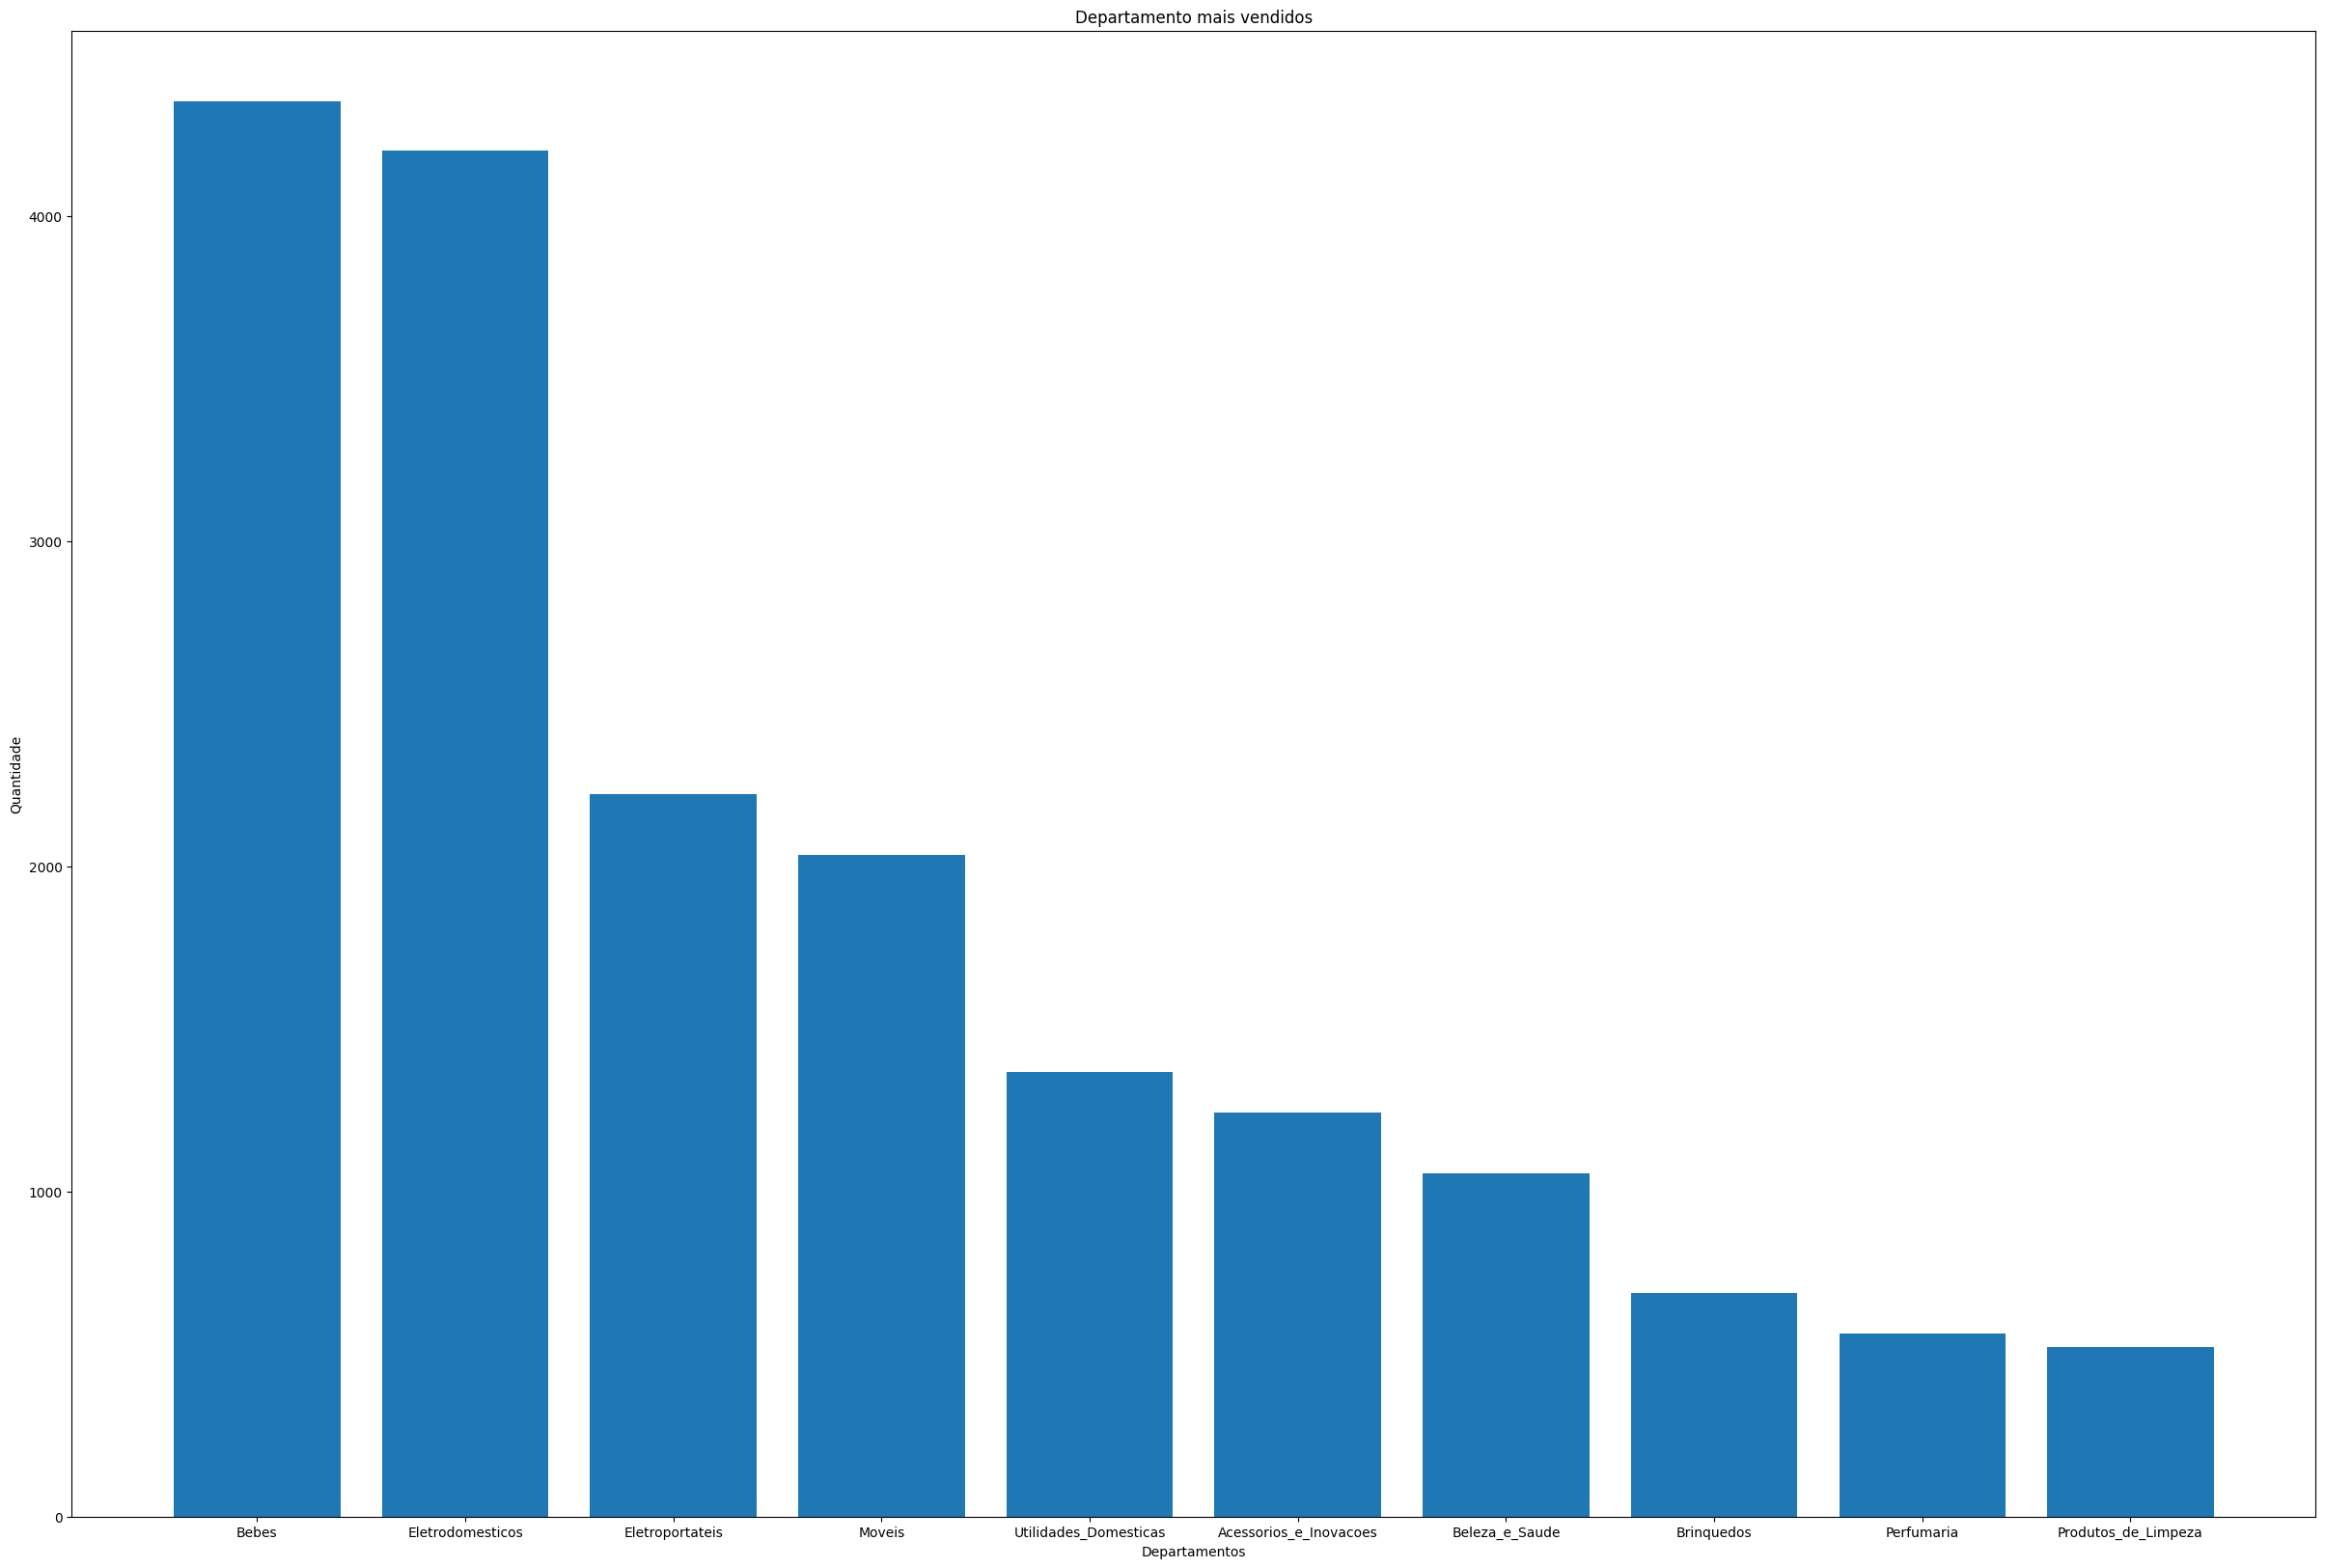

In [94]:
# GRAFICO METRICA 1

mais_vendidos = vendas_correta.groupby("Nome_departamento").Idcompra.nunique().sort_values(ascending = False).reset_index().head(10)
fig = plt.figure(figsize = (30,20))
x = mais_vendidos["Nome_departamento"]
y = mais_vendidos["Idcompra"]
plt.xlabel("Departamentos")
plt.ylabel("Quantidade")
plt.title("Departamento mais vendidos")
plt.bar(x,y)
plt.show()

In [66]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [87]:
fig = px.bar(agg_idade_bandeira,x = "Bandeira",y = "Idade")
fig.update_layout(title={
    'text' : 'Média de idade por bandeira',
    'y': 0.95,
    'x': 0.5
})
fig.show()

In [86]:
fig1 = px.line(vendas_por_data,x = "Data", y = "Idcompra",labels = {"Idcompra": "Quantidade"})
fig1.update_layout(title={
    'text' : 'Quantidade de compra no tempo',
    'y': 0.95,
    'x': 0.5
})
fig1.show()

In [90]:
fig2 = px.bar(agg_dept_preco,x = "Nome_departamento", y = "Preço_com_frete",labels = {"Nome_departamento": "Departamento","Preço_com_frete":"Preço"})
fig2.update_layout(title={
    'text' : 'Média de vendas por departamento',
    'y': 0.95,
    'x': 0.5
})
fig2.show()